In [2]:
#Data Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("haberman.csv",names=['Age','Year_Of_Operation','Axial_Nodes','Class'])
print(data.shape)
temp=data.groupby('Class')
for i,j in temp:
    print(i,j.shape[0])
class_1=data.loc[data['Class']==1]
class_2=data.loc[data['Class']==2]
print(data.describe())
print(len(data.columns))
print(data.head())

(306, 4)
1 225
2 81
              Age  Year_Of_Operation  Axial_Nodes       Class
count  306.000000         306.000000   306.000000  306.000000
mean    52.457516          62.852941     4.026144    1.264706
std     10.803452           3.249405     7.189654    0.441899
min     30.000000          58.000000     0.000000    1.000000
25%     44.000000          60.000000     0.000000    1.000000
50%     52.000000          63.000000     1.000000    1.000000
75%     60.750000          65.750000     4.000000    2.000000
max     83.000000          69.000000    52.000000    2.000000
4
   Age  Year_Of_Operation  Axial_Nodes  Class
0   30                 64            1      1
1   30                 62            3      1
2   30                 65            0      1
3   31                 59            2      1
4   31                 65            4      1


Observations or Conclusions

1.The number of total data points are 306.

2.The total number of columns in the dataset are 4.

3.The total number of Classes of the dataset are 2.

4.The total number of datapoints for Class '1' are 225 and of Class '2' are 81.

5.So as the number of instances of both the Class are not same so the given dataset is an unbalanced dataset.

6.The total number of independent variables in the dataset are 3 and number of the dependent variables are 1.



Objective:
    Given the value of ['Age','Year_Of_Operation','Axial_Nodes'] for a person,I need to classify whether the person belongs
    to Class 1 or Class 2
    
    Class 1:-The person survived 5 years or longer
    
    Class 2:-The person died within the 5 yerar
    
    

C:\Users\om\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\om\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


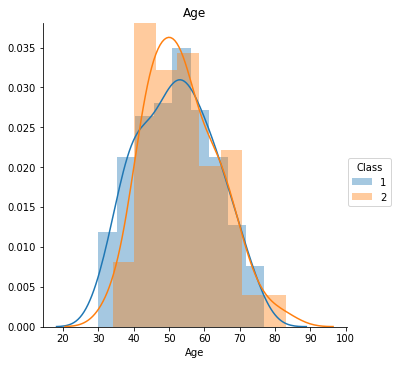

In [3]:
#Univariate analysis

sns.FacetGrid(data,hue='Class',size=5)\
             .map(sns.distplot,"Age")\
             .add_legend()
plt.title("Age")
plt.show()

Observations or Conclusions

1.Using Age as my only feature it is difficult to build a accurate model because the PDF of class 1 has totally overlapped PDF of class 2.

2.The PDF of class 1 is almost inside the PDF of class 2 high Overalapping of the data is seen.

C:\Users\om\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\om\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


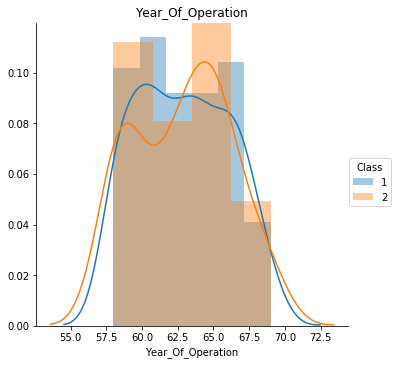

In [4]:
sns.FacetGrid(data,hue='Class',size=5)\
             .map(sns.distplot,"Year_Of_Operation")\
             .add_legend()
plt.title("Year_Of_Operation")
plt.show()

Observations or Conclusions

1.Using Year_Of_Operation as my only feature it is difficult to build a accurate model because the PDF of class 1 has totally overlapped PDF of class 2


C:\Users\om\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\om\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


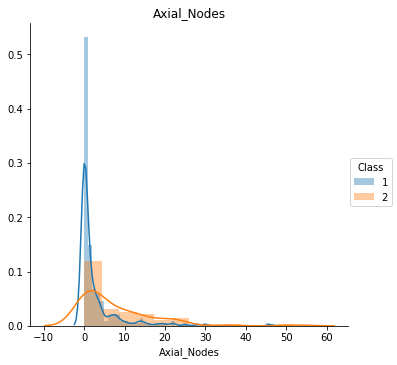

In [5]:
sns.FacetGrid(data,hue='Class',size=5)\
             .map(sns.distplot,"Axial_Nodes")\
             .add_legend()
plt.title("Axial_Nodes")
plt.show()

Observations and Conclusions

1.U can see from -10 to -3 value as axial_nodes there is no data point of class 1,so we conclude that if axial_node falls in this range we directly classify the point as class '2' and overlapping of both the PDF starts from -2 and the maximum number of points of class 1 are found from 0 to 4(approximate value) So we can classify such data points as Class '1' and else we 
can classify as class '2'.So From the Univariate Analysis I would have chosen Axial_Nodes as my feature to classify 
whether the person belongs to class '1' or class '2'

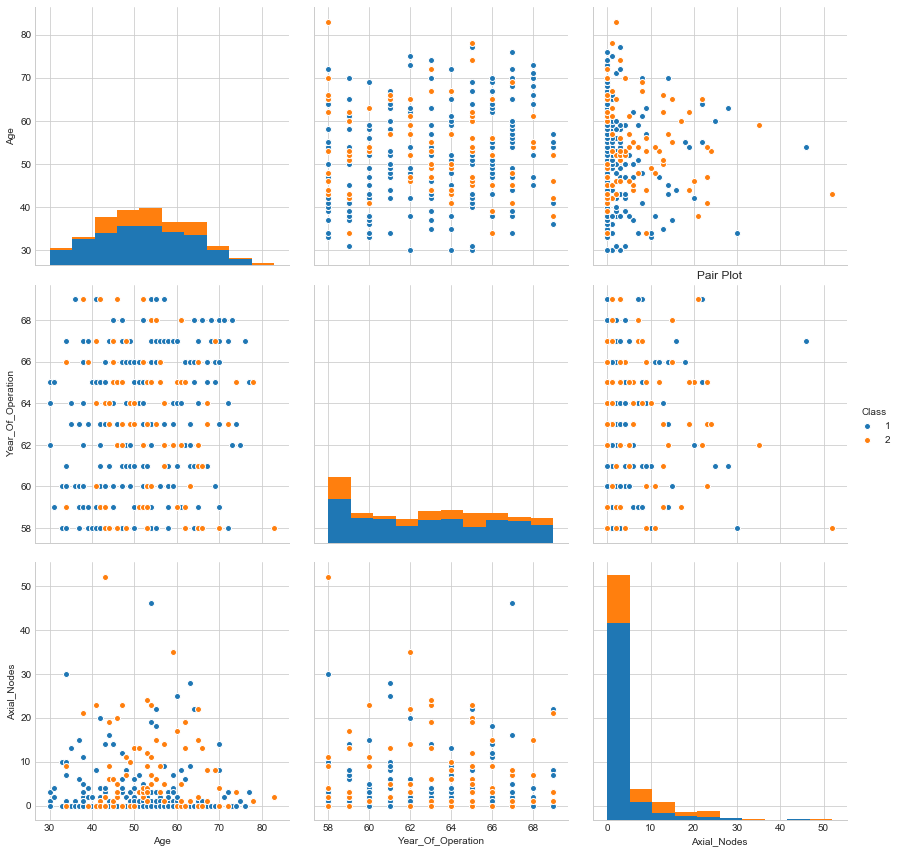

In [6]:
sns.set_style("whitegrid")
sns.pairplot(data,hue='Class',vars=["Age","Year_Of_Operation","Axial_Nodes"],size=4)
plt.title("Pair Plot")
plt.show()

Observations and Conclusions
1.As there are 3 features total 3 pair plots are possible.

2.For plot Age vs Year_Of_Operation the data points are scattered in random directions,it is very difficult to build 
  a model using Age and Year_Of_Operation,In simple words it is not possible to directly separate or differentiate the
  Classes by drawing a line or such

3.For plot Age vs Axial_Nodes the plot is even worst beacause of high overlapping of data points

4.For plot of Year_Of_Operation vs Axial_Nodes the plot is almost similar to the plot Age vs Year_Of_Operation not exactly
  same but its similar

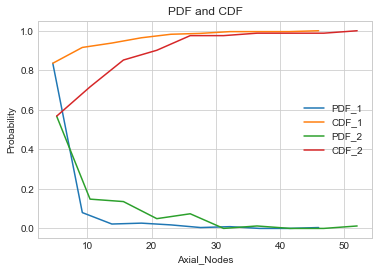

In [20]:
counts,edges=np.histogram(class_1['Axial_Nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(edges[1:],pdf,label="PDF_1") #Blue line indicates PDF of class 1
plt.plot(edges[1:],cdf,label="CDF_1") #Orange line indicates CDF of class 1
plt.title("PDF and CDF")
plt.xlabel("Axial_Nodes")
plt.ylabel("Probability")


counts,edges=np.histogram(class_2['Axial_Nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(edges[1:],pdf) #Green Line indicates PDF of class 1
plt.plot(edges[1:],cdf) #Red Line indicates CDF of class 2
plt.legend(['PDF_1','CDF_1','PDF_2','CDF_2'])
plt.show()

Observations 

1.So your 90% of the data points of class '1' have axial_nodes<=10(approx)
2.So your 100% of the data points of class '2' have axial_nodes<=50 and all the data points for the class '1' have axial_nodes<=45


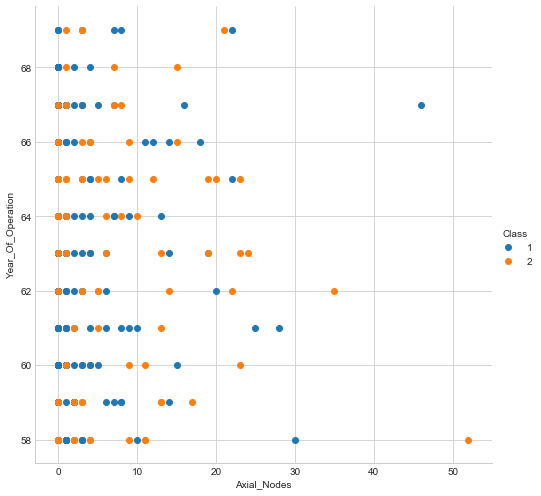

In [26]:
sns.FacetGrid(hue='Class',data=data,size=7)\
            .map(plt.scatter,"Axial_Nodes","Year_Of_Operation")\
            .add_legend()

Observations and Conclusions

1.Difficult to Separate the points of Class 1 and Class 2 by doing the bivariate analaysis of both the features.
2.High Overlapping

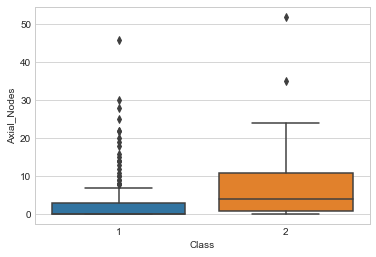

In [13]:
sns.boxplot(x="Class",y="Axial_Nodes",data=data)
plt.show()

Observations
1.So from the above box plot You can conclude that almost 90 to 95 % of the points of class '1' have axial_nodes<9

2.Yes there are some points of Class '2' which belong to that range.As You Can see from the plot 75% points of
  Class '1' have axial_nodes value even less than 4 whereas only 35-40 % of the points of Class '2' fall in this range
  So it is more likely to Classify such points as of Class '1' instead of Class '2'
  
3.Also there are some outliers in the dataset which may decrease the accuracy if they are not handled properly.

4.The threshold value can be set as 6 or 7 because there are less than 20 to 25% of the points of class 1 who have axial_nodes
value greater than 6 or 7 and whereas in the case of Class '2' there are more than 50 % of the points which fall in this category,So threshold value of 6 or 7 will best the fit the model.